# Plot ApRES melt rates accross the channel profile at KIS2

I used /Users/home/whitefar/DATA/code/APRES/debug_melts.m to look at each melt rate profile and make sure they looked okay.
then /Users/home/whitefar/CODE/apres/apresBatchProcess.m to output KIS2_ApresResults.csv
using Matlab2019 running on co522pc01

## Large error in CP08
Definitely right file, cfg.polyorder=2 dont help. Moving the bed pick dont help.

In [1]:
import fiona
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt
from scipy import interpolate

from shapely.geometry import LineString


import rasterio as rio
import rasterio.mask




In [2]:
df = pd.read_csv('/Users/home/whitefar/CODE/apres/KIS2_ApresResults.csv')
df = df.sort_values('x')
points = [Point(xy) for xy in zip(df.x,df.y) ]
gdf = gpd.GeoDataFrame(df,geometry=points,crs=3031)

In [3]:
gdf.keys()

Index(['sitenames', 'x', 'y', 'melt_rate', 'melt_rate_error',
       'vertical_strain_rate', 'vertical_strain_rate_error', 'dt', 'melt',
       'melt_error', 'depth', 'geometry'],
      dtype='object')

In [4]:
# plt.figure(figsize=(10,7),dpi=300)
# plt.errorbar(gdf.x,gdf.melt_rate,yerr=gdf.melt_rate_error,xerr=0,marker='o',linestyle="None")
# plt.grid()
# plt.title('errors in melt rates')
# plt.xlabel('x (UTM, m)')
# plt.ylabel('melt rate (m/a)')

In [5]:
# fig, ax1 = plt.subplots(figsize=(12,7),dpi=300)
# color = 'tab:red'
# ax1.set_xlabel('x',fontsize=18)
# ax1.set_ylabel('depth (m)', color=color,fontsize=18)
# ax1.plot(gdf.x,gdf.depth, marker='o', color=color)

# ax1.tick_params(axis='y', labelcolor=color)
# ax1.grid()

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('melt rate (m/a)', color=color,fontsize=18)  # we already handled the x-label with ax1
# ax2.plot(gdf.x,gdf.melt_rate,marker='s', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.grid()
# ax2.axhline(y=0,color='k',linestyle=':')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()


# plot where it is on map

In [6]:

# nid1 = 159202
# nid2 = 131226
# kis2 = [-380737.537026,-724683.311299]
# line_name = 'lineAPREScross'
# v=[0,10]
# df_R = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/REMA_Strip_Index_Rel1.shp')

# path = f"/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/DIFFERENCES/REMA_{nid1}-{nid2}_diff.tif"
# image = rio.open(path)

# extent = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
# gdf_R = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
#                     +line_name+".shp")
# f = df_R.loc[nid1].acquisitio
# t =df_R.loc[nid2].acquisitio
# xmin,xmax = [gdf_R.geometry.x.to_numpy().min(),gdf_R.geometry.x.to_numpy().max()]
# ymin,ymax = [gdf_R.geometry.y.to_numpy().min(),gdf_R.geometry.y.to_numpy().max()]
# plt.figure(figsize=(15,14),dpi=300)
# plt.imshow(image.read(1),extent=extent, vmin=v[0],vmax=v[1])
# plt.xlim([xmin-2000, xmax])
# plt.ylim([ymin-1000,ymax+1000])
# cb = plt.colorbar()
# plt.plot(gdf_R.geometry.x,gdf_R.geometry.y,'y')
# plt.plot(gdf.geometry.x,gdf.geometry.y,'oc')
# plt.plot(kis2[0],kis2[1],'y^')
# plt.title(f'REMA elevation change from {f} till {t}')
# cb.set_label('elevation change, m')
# plt.legend(['Radar line','ApRES points','KIS2 camp'])
# plt.xlabel('x')
# plt.ylabel('y')

In [7]:
gdf.keys()

Index(['sitenames', 'x', 'y', 'melt_rate', 'melt_rate_error',
       'vertical_strain_rate', 'vertical_strain_rate_error', 'dt', 'melt',
       'melt_error', 'depth', 'geometry'],
      dtype='object')

In [9]:
# plt.figure(figsize=(10,7),dpi=300)
# plt.errorbar(gdf.x,gdf.vertical_strain_rate,yerr=gdf.vertical_strain_rate_error,xerr=0,marker='o',linestyle="None")
# plt.grid()
# plt.xlabel('x (UTM, m)')
# plt.ylabel('vertical strain rate')

In [10]:
# fig, ax1 = plt.subplots(figsize=(12,7),dpi=300)
# color = 'tab:red'
# ax1.set_xlabel('x (UTM, m)',fontsize=18)
# ax1.set_ylabel('depth (m)', color=color,fontsize=18)
# ax1.plot(gdf.x,gdf.depth, marker='o', color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.grid()

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('vertical strain rate', color=color,fontsize=18)  # we already handled the x-label with ax1
# ax2.plot(gdf.x,gdf.vertical_strain_rate,marker='s', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.grid()
# ax2.axhline(y=0,color='k',linestyle=':')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()


# Plot with the surface as well

In [11]:
radar_APREScross = gpd.read_file('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/lineAPREScross.shp')
radar_APREScross.keys()

Index(['timestamp', 'height', 'dt', 'velocity', 'acc', 'dx', 'distan_cum',
       'nid_122088', 'nid_131225', 'nid_131226', 'nid_131228', 'nid_145073',
       'nid_159199', 'nid_159200', 'nid_159202', 'geometry'],
      dtype='object')

In [12]:
f = interpolate.interp1d(radar_APREScross.geometry.x,radar_APREScross.height)
surf_fordepth = f(gdf.x)

In [13]:
# fig, ax1 = plt.subplots(figsize=(12,7),dpi=300)
# color = 'tab:blue'
# ax1.set_xlabel('x (UTM, m)',fontsize=18)
# ax1.set_ylabel('elevation (m)', color=color,fontsize=18)
# ax1.plot(gdf.x,surf_fordepth - gdf.depth, marker='o', color=color)
# ax1.plot(radar_APREScross.geometry.x,radar_APREScross.height, color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.grid()
# plt.legend(['base','surface'])

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:red'
# ax2.set_ylabel('vertical strain rate', color=color,fontsize=18)  # we already handled the x-label with ax1
# ax2.plot(gdf.x,gdf.vertical_strain_rate,marker='s', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.grid()
# ax2.axhline(y=0,color='r',linestyle=':')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

In [14]:
# fig, ax1 = plt.subplots(figsize=(12,7),dpi=300)
# color = 'tab:blue'
# ax1.set_xlabel('x (UTM, m)',fontsize=18)
# ax1.set_ylabel('elevation (m)', color=color,fontsize=18)
# ax1.plot(gdf.x,surf_fordepth - gdf.depth, marker='o', color=color)
# ax1.plot(radar_APREScross.geometry.x,radar_APREScross.height, color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.grid()
# plt.legend(['base','surface'])

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:red'
# ax2.set_ylabel('melt rate (m/a)', color=color,fontsize=18)  # we already handled the x-label with ax1
# ax2.plot(gdf.x,gdf.melt_rate,marker='s', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.grid()
# ax2.axhline(y=0,color='r',linestyle=':')


# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

In [15]:
# fig, ax1 = plt.subplots(figsize=(12,7),dpi=300)
# color = 'tab:blue'
# ax1.set_xlabel('x (UTM, m)',fontsize=18)
# ax1.set_ylabel('elevation (m)', color=color,fontsize=18)
# ax1.plot(gdf.x,surf_fordepth - gdf.depth, marker='o', color=color)
# ax1.plot(radar_APREScross.geometry.x,radar_APREScross.height, color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.grid()
# plt.legend(['base','surface'])

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:red'
# ax2.set_ylabel('melt rate (m/a)', color=color,fontsize=18)  # we already handled the x-label with ax1
# ax2.plot(gdf.x,gdf.melt_rate,marker='s', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.grid()
# ax2.axhline(y=0,color='r',linestyle=':')


# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

In [16]:
geoid_correction = 47

In [17]:
xgrid = np.arange(-382000,-374000,1000)

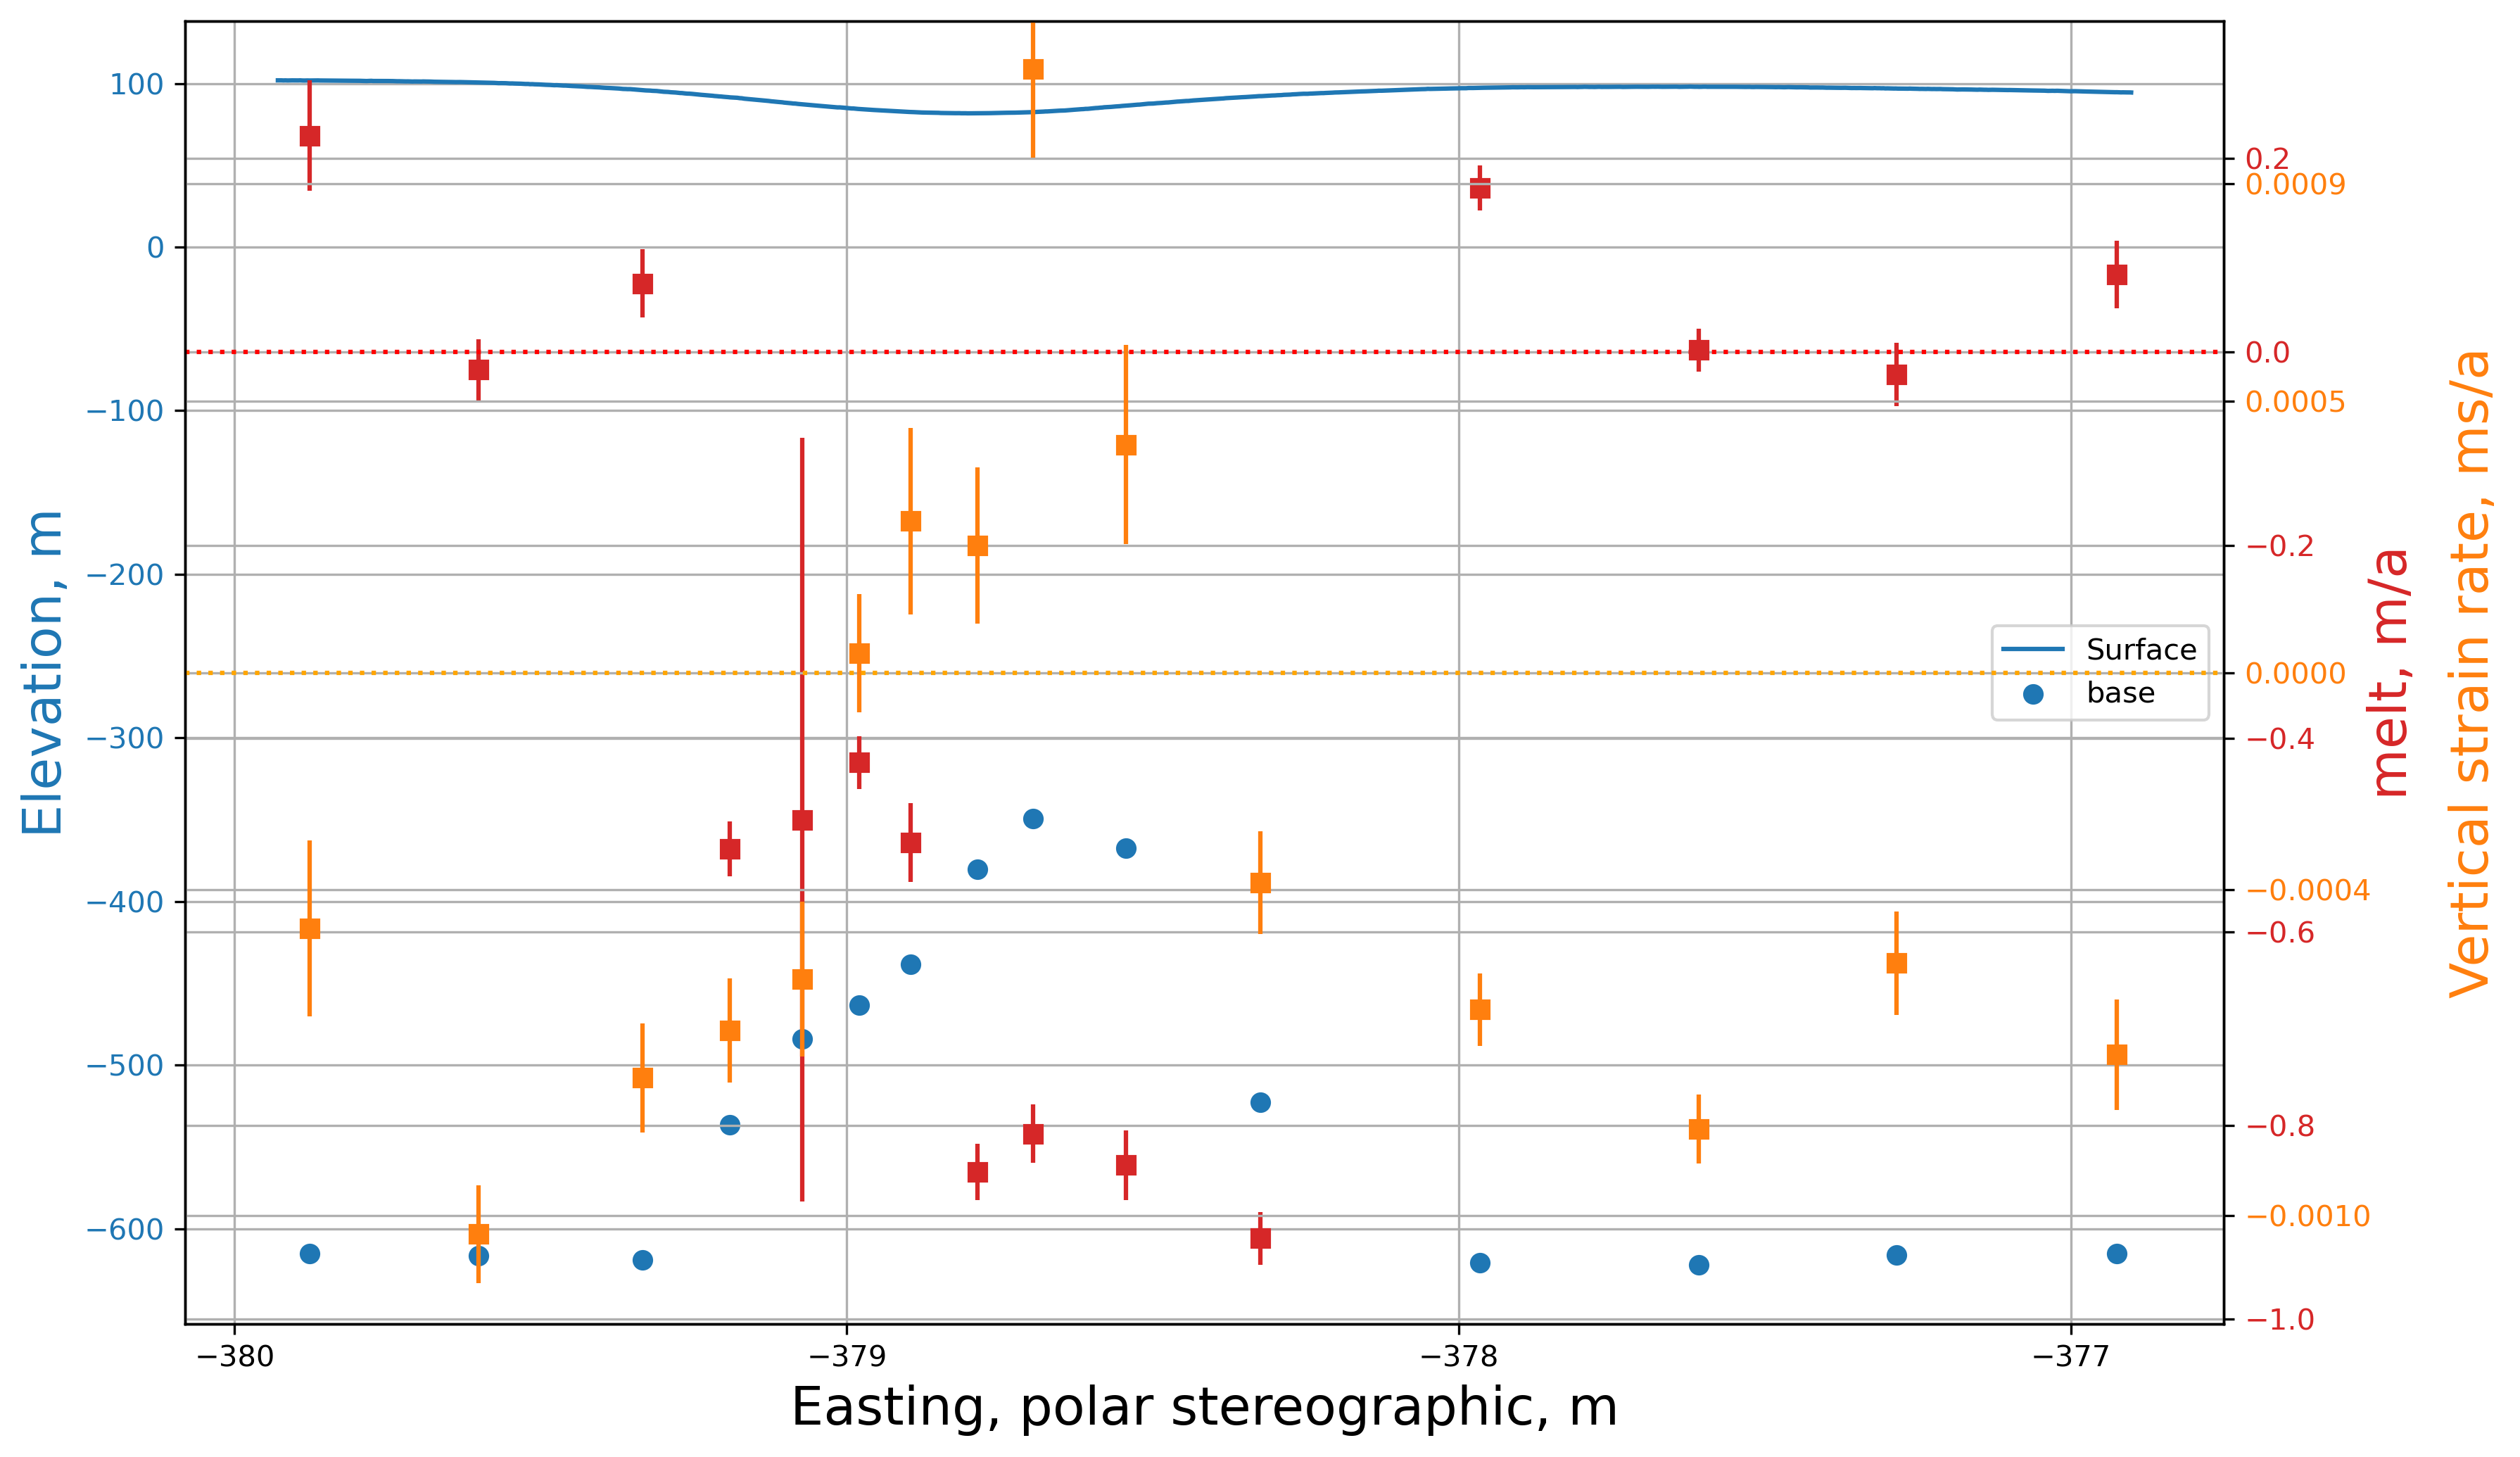

In [22]:
#https://matplotlib.org/3.1.1/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

fig, ax1 = plt.subplots(figsize=(12,7),dpi=300)
color = 'tab:blue'
ax1.set_xlabel('Easting, polar stereographic, m',fontsize=18)
ax1.set_ylabel('Elevation, m', color=color,fontsize=18)
ax1.scatter(gdf.x/1000,surf_fordepth - gdf.depth +geoid_correction, marker='o', color=color)

ax1.plot(radar_APREScross.geometry.x/1000,radar_APREScross.height+geoid_correction, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()
plt.legend(['Surface','base'])
ax1.set_xticks(xgrid/1000)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('melt, m/a', color=color,fontsize=18)  # we already handled the x-label with ax1
ax2.errorbar(gdf.x/1000,gdf.melt_rate,yerr=gdf.melt_rate_error,xerr=0,marker='s', color=color,linestyle="None")
# ax2.scatter(gdf.x,gdf.melt_rate,marker='s', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()
ax2.axhline(y=0,color='r',linestyle=':')
ax2.yaxis.set_label_coords(1.07, 0.5)

ax3 = ax1.twinx() 

color = 'tab:orange'
ax3.set_ylabel('Vertical strain rate, ms/a', color=color,fontsize=18)  # we already handled the x-label with ax1
ax3.yaxis.set_label_coords(1.11, 0.5)
ax3.errorbar(gdf.x/1000,gdf.vertical_strain_rate,yerr=gdf.vertical_strain_rate_error,xerr=0,marker='s', color=color,linestyle="None")
# ax3.scatter(gdf.x,gdf.vertical_strain_rate,marker='s', color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.grid()
ax3.set_yticks([-0.001,-0.0004,0,0.0005,0.0009])
ax3.set_ylim([-0.0012,0.0012])
ax3.axhline(y=0,color='orange',linestyle=':')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/APRES_melt.png')

plt.show()

In [23]:
gdf.vertical_strain_rate.min()

-0.0010339000000000001

In [24]:
gdf.vertical_strain_rate.max()

0.0011115